**Практический пример #2** \\
Доклад: Структурированная нормализация текста с использованием недетерминированных FST \\
Автор: Владимир Марков ([@markovvn1](https://t.me/markovvn1))

In [ ]:
!pip install pynini==2.1.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 MB 3.6 MB/s eta 0:00:00


In [ ]:
import pynini

In [ ]:
def draw(fst):
  ascii_table = pynini.SymbolTable()
  ascii_table.add_symbol("<eps>", 0)
  for i in range(12, 128):
    ascii_table.add_symbol(chr(i), i)
  fst.set_input_symbols(ascii_table)
  fst.set_output_symbols(ascii_table)
  return fst

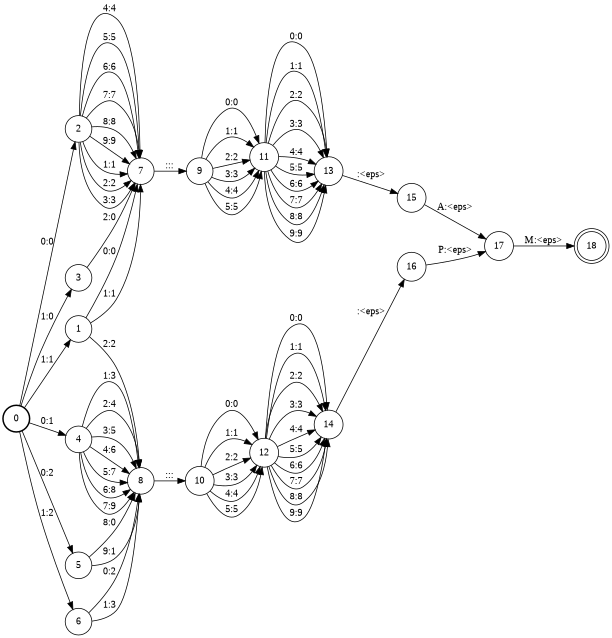

In [ ]:
convert_AM_hours = pynini.union(*[pynini.cross(f"{i:02d}", f"{i % 12:02d}") for i in range(1, 13)])
convert_PM_hours = pynini.union(*[pynini.cross(f"{i:02d}", f"{i % 12 + 12:02d}") for i in range(1, 13)])
any_minutes = pynini.union(*"012345") + pynini.union(*"0123456789")
fst = ((convert_AM_hours + ":" + any_minutes + pynini.cross(" AM", "")) | (convert_PM_hours + ":" + any_minutes + pynini.cross(" PM", ""))).optimize()

for state in fst.states():
  fst.set_final(state)
draw(fst)

['00:15', '12:15']


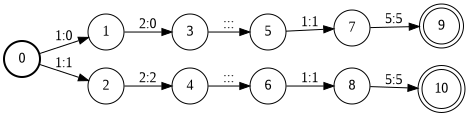

In [ ]:
print(list(("12:15" @ fst).paths().ostrings()))
draw("12:15" @ fst)

In [ ]:
print(("12:15 AM" @ fst).string())
print(("05:34 AM" @ fst).string())
print(("12:52 PM" @ fst).string())
print(("05:21 PM" @ fst).string())

00:15
05:34
12:52
17:21
